In [192]:
import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [193]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [194]:
train_labels=[]
train_samples=[]

In [195]:

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [196]:
train_samples

[50,
 92,
 58,
 72,
 14,
 75,
 34,
 78,
 44,
 75,
 17,
 79,
 41,
 77,
 36,
 78,
 44,
 70,
 51,
 89,
 50,
 89,
 45,
 96,
 30,
 98,
 14,
 72,
 64,
 74,
 20,
 85,
 38,
 90,
 15,
 68,
 48,
 81,
 57,
 74,
 27,
 68,
 17,
 76,
 46,
 85,
 53,
 80,
 62,
 78,
 38,
 76,
 24,
 71,
 46,
 92,
 27,
 97,
 20,
 90,
 30,
 71,
 31,
 96,
 24,
 90,
 45,
 100,
 22,
 81,
 34,
 96,
 50,
 74,
 40,
 85,
 39,
 85,
 33,
 88,
 25,
 94,
 37,
 80,
 25,
 70,
 42,
 65,
 41,
 81,
 64,
 75,
 60,
 98,
 16,
 100,
 28,
 89,
 36,
 75,
 45,
 99,
 36,
 92,
 23,
 93,
 20,
 80,
 56,
 82,
 51,
 88,
 23,
 98,
 20,
 91,
 34,
 87,
 55,
 95,
 60,
 80,
 41,
 72,
 57,
 82,
 36,
 65,
 31,
 66,
 48,
 71,
 34,
 79,
 46,
 93,
 63,
 81,
 21,
 68,
 39,
 72,
 37,
 68,
 56,
 76,
 27,
 84,
 14,
 80,
 55,
 68,
 46,
 90,
 19,
 85,
 63,
 74,
 18,
 99,
 33,
 68,
 36,
 74,
 15,
 90,
 64,
 67,
 43,
 70,
 39,
 94,
 62,
 68,
 30,
 70,
 32,
 67,
 61,
 65,
 32,
 68,
 13,
 76,
 22,
 70,
 26,
 91,
 23,
 69,
 52,
 92,
 24,
 85,
 57,
 81,
 63,
 67,
 46,
 93

In [197]:
test_labels=[]
test_samples=[]

In [198]:
for i in range(50):
    random_younger = randint(13, 64)
    test_labels.append(0)
    test_samples.append(random_younger)
    
    random_older= randint(65,100)
    test_labels.append(1)
    test_samples.append(random_older)
for i in range(200):
    random_younger = randint(13, 64)
    test_labels.append(0)
    test_samples.append(random_younger)
    
    random_older= randint(65,100)
    test_labels.append(1)
    test_samples.append(random_older)

In [199]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [200]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [201]:
train_labels

array([0, 1, 0, ..., 1, 0, 1])

In [202]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

C:\Users\rashid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [203]:
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

C:\Users\rashid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(array([62., 44., 37., 36., 37., 38., 55., 66., 57., 68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

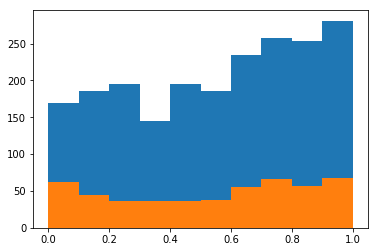

In [204]:
import matplotlib.pyplot as plt

plt.hist(scaled_train_samples)
plt.hist(scaled_test_samples)

In [205]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [206]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [208]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle =True, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6795 - acc: 0.5576
Epoch 2/20
 - 0s - loss: 0.6483 - acc: 0.6843
Epoch 3/20
 - 0s - loss: 0.6121 - acc: 0.7510
Epoch 4/20
 - 0s - loss: 0.5703 - acc: 0.7924
Epoch 5/20
 - 0s - loss: 0.5275 - acc: 0.8157
Epoch 6/20
 - 0s - loss: 0.4837 - acc: 0.8500
Epoch 7/20
 - 0s - loss: 0.4392 - acc: 0.8790
Epoch 8/20
 - 0s - loss: 0.3956 - acc: 0.9010
Epoch 9/20
 - 0s - loss: 0.3545 - acc: 0.9186
Epoch 10/20
 - 0s - loss: 0.3168 - acc: 0.9295
Epoch 11/20
 - 0s - loss: 0.2834 - acc: 0.9390
Epoch 12/20
 - 0s - loss: 0.2542 - acc: 0.9443
Epoch 13/20
 - 0s - loss: 0.2292 - acc: 0.9471
Epoch 14/20
 - 0s - loss: 0.2078 - acc: 0.9567
Epoch 15/20
 - 0s - loss: 0.1895 - acc: 0.9619
Epoch 16/20
 - 0s - loss: 0.1738 - acc: 0.9667
Epoch 17/20
 - 0s - loss: 0.1606 - acc: 0.9667
Epoch 18/20
 - 0s - loss: 0.1491 - acc: 0.9714
Epoch 19/20
 - 0s - loss: 0.1392 - acc: 0.9719
Epoch 20/20
 - 0s - loss: 0.1306 - acc: 0.9762


In [209]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, verbose=2, shuffle=True)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.1228 - acc: 0.9772 - val_loss: 0.1273 - val_acc: 0.9714
Epoch 2/20
 - 0s - loss: 0.1168 - acc: 0.9772 - val_loss: 0.1206 - val_acc: 0.9714
Epoch 3/20
 - 0s - loss: 0.1116 - acc: 0.9772 - val_loss: 0.1156 - val_acc: 0.9714
Epoch 4/20
 - 0s - loss: 0.1068 - acc: 0.9772 - val_loss: 0.1106 - val_acc: 0.9714
Epoch 5/20
 - 0s - loss: 0.1025 - acc: 0.9772 - val_loss: 0.1061 - val_acc: 0.9714
Epoch 6/20
 - 0s - loss: 0.0988 - acc: 0.9778 - val_loss: 0.1014 - val_acc: 0.9905
Epoch 7/20
 - 0s - loss: 0.0949 - acc: 0.9894 - val_loss: 0.1000 - val_acc: 0.9714
Epoch 8/20
 - 0s - loss: 0.0917 - acc: 0.9878 - val_loss: 0.0957 - val_acc: 0.9714
Epoch 9/20
 - 0s - loss: 0.0887 - acc: 0.9836 - val_loss: 0.0924 - val_acc: 0.9714
Epoch 10/20
 - 0s - loss: 0.0858 - acc: 0.9878 - val_loss: 0.0894 - val_acc: 0.9714
Epoch 11/20
 - 0s - loss: 0.0832 - acc: 0.9878 - val_loss: 0.0853 - val_acc: 0.9905
Epoch 12/20
 - 0s - loss: 0.0808 - acc

In [210]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [213]:
predictions = np.round(predictions[:, 0])

In [214]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [215]:
rounded_predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [216]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [217]:
cm = confusion_matrix(test_labels, rounded_predictions)


In [219]:
def plot_confusion_matrix(cm, classes, normalize=True, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print("Confusion matrix, without Normalization")
        
    print(cm)
    
    thresh = cm.max()/2
    plt.text(j,i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Normalized Confusion Matrix
[[247   3]
 [  0 250]]


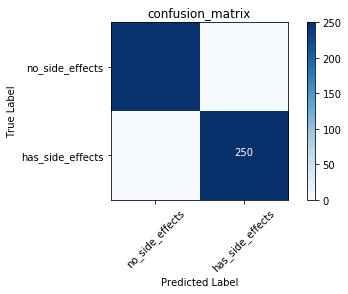

In [220]:
cm_plot_labels = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')

Image Classification

In [221]:
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import  matplotlib.pyplot  as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools


In [222]:
train_path = "c:/Users/rashid/Desktop/cat_and_dogs/train"
test_path = "c:/Users/rashid/Desktop/cat_and_dogs/test"
valid_path  = "c:/Users/rashid/Desktop/cat_and_dogs/valid"

In [223]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [225]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows+1
    for i  in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

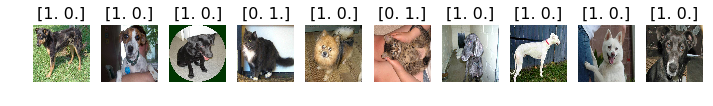

In [226]:
imgs, labels =next(train_batches)
plots(imgs, titles=labels)

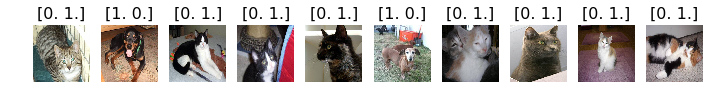

In [227]:
imgs, labels =next(train_batches)
plots(imgs, titles=labels)

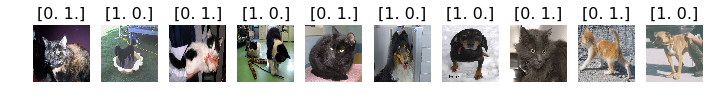

In [228]:
imgs, labels =next(train_batches)
plots(imgs, titles=labels)

In [229]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [230]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [231]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [232]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 2s - loss: 5.6414 - acc: 0.6500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


In [233]:
test_imgs, test_labels = next(test_batches)

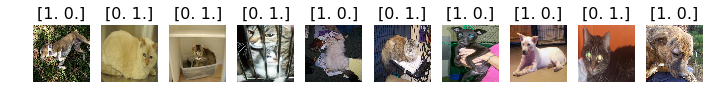

In [234]:
plots(test_imgs, titles=test_labels)

In [235]:
test_lables = test_labels[:, 0]
test_lables

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 1.], dtype=float32)

In [236]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [237]:
predictions=predictions[:, 0]

In [238]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [239]:
test_labels = test_labels[:, 0]

In [240]:
cm = confusion_matrix(test_labels, predictions)

In [241]:
cm

array([[0, 5],
       [0, 5]], dtype=int64)

Normalized Confusion Matrix
[[0 5]
 [0 5]]


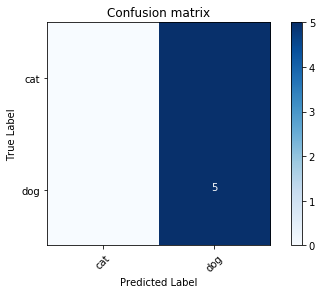

In [242]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')

Build fine tune vgg16 model

In [243]:
vgg16_model = keras.applications.vgg16.VGG16()

In [244]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [245]:
type(vgg16_model)

keras.engine.training.Model

In [246]:
model = Sequential()
i=0
for layer in vgg16_model.layers:
    if i==22:
        break
    else:
        model.add(layer)
        i+=1

In [247]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [248]:
type(model)

keras.engine.sequential.Sequential

In [249]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [250]:
for layer in model.layers:
    layer.trainable = False

In [251]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [252]:
model.add(Dense(2, activation='softmax'))

In [253]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [254]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [255]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 22s - loss: 0.6908 - acc: 0.6500 - val_loss: 0.9874 - val_acc: 0.6250
Epoch 2/5
 - 22s - loss: 0.4825 - acc: 0.7750 - val_loss: 0.7327 - val_acc: 0.7500
Epoch 3/5
 - 21s - loss: 0.3419 - acc: 0.8750 - val_loss: 0.5703 - val_acc: 0.8125
Epoch 4/5
 - 22s - loss: 0.2658 - acc: 0.9250 - val_loss: 0.4342 - val_acc: 0.8125
Epoch 5/5
 - 22s - loss: 0.1982 - acc: 0.9250 - val_loss: 0.3397 - val_acc: 0.8125


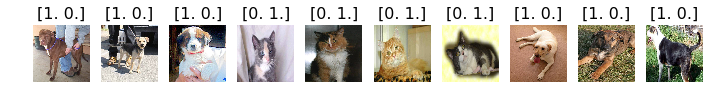

In [256]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [257]:
test_labels = test_labels[:, 0]
test_labels

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [258]:
predictions = model.predict_generator(test_batches, steps =1,verbose=0)

In [259]:
predictions = np.round(predictions[:,0])
predictions

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)

In [260]:
cm = confusion_matrix(test_labels, predictions)

In [261]:
cm

array([[3, 1],
       [2, 4]], dtype=int64)

Normalized Confusion Matrix
[[3 1]
 [2 4]]


IndexError: index 22 is out of bounds for axis 0 with size 2

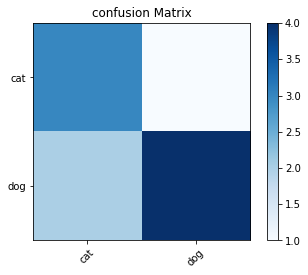

In [262]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title = 'confusion Matrix')

Data Augementation occurs when you create new data based on modification of your existing data.
Data Augumentaion on images would include transformations like:
    1. Flipping the image either horizentally pr vertically
    2. Rotating
    3. Zooming
    4. Cropping
    5. Varying the color of the image
    

In [ ]:
from scipy import misc, ndimage
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows+1
    for i  in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [268]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)

In [269]:
image_path = 'images/test.jpg'

C:\Users\rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


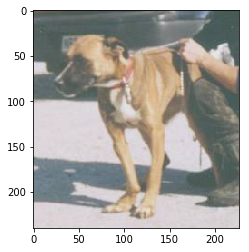

In [271]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [272]:
aug_iter = gen.flow(image)

In [273]:
aug_images =[next(aug_iter)[0].astype(np.int8) for i in range(10)]

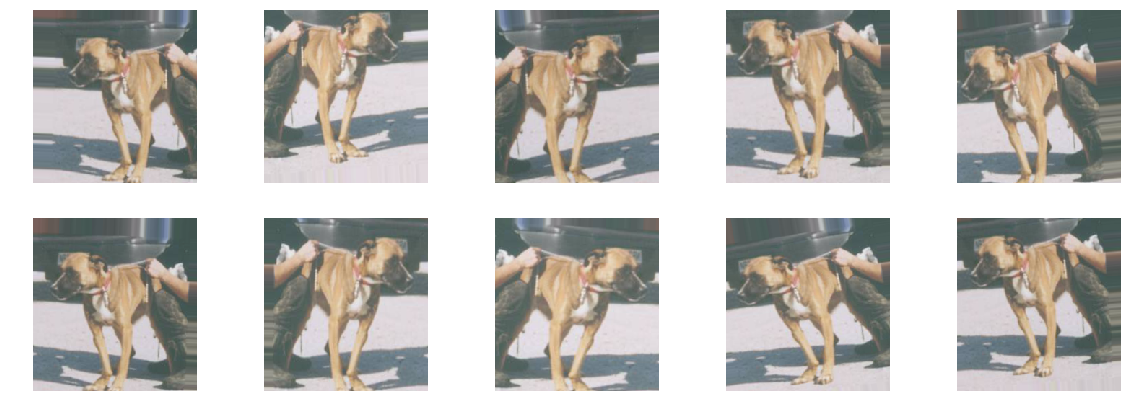

In [274]:
plots(aug_images,figsize=(20,7), rows=2)